In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 2\Loan Application Status Prediction\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [70]:
print ("\nMissing values  :  ", df.isnull().sum().values.sum())
print ("\nUnique values : \n", df.nunique()) 


Missing values  :   149

Unique values : 
 Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


In [71]:
df['Loan_Status'].value_counts(sort=False)

N    192
Y    422
Name: Loan_Status, dtype: int64

# Exploratory Data Analysis

In [72]:
del df['Loan_ID']

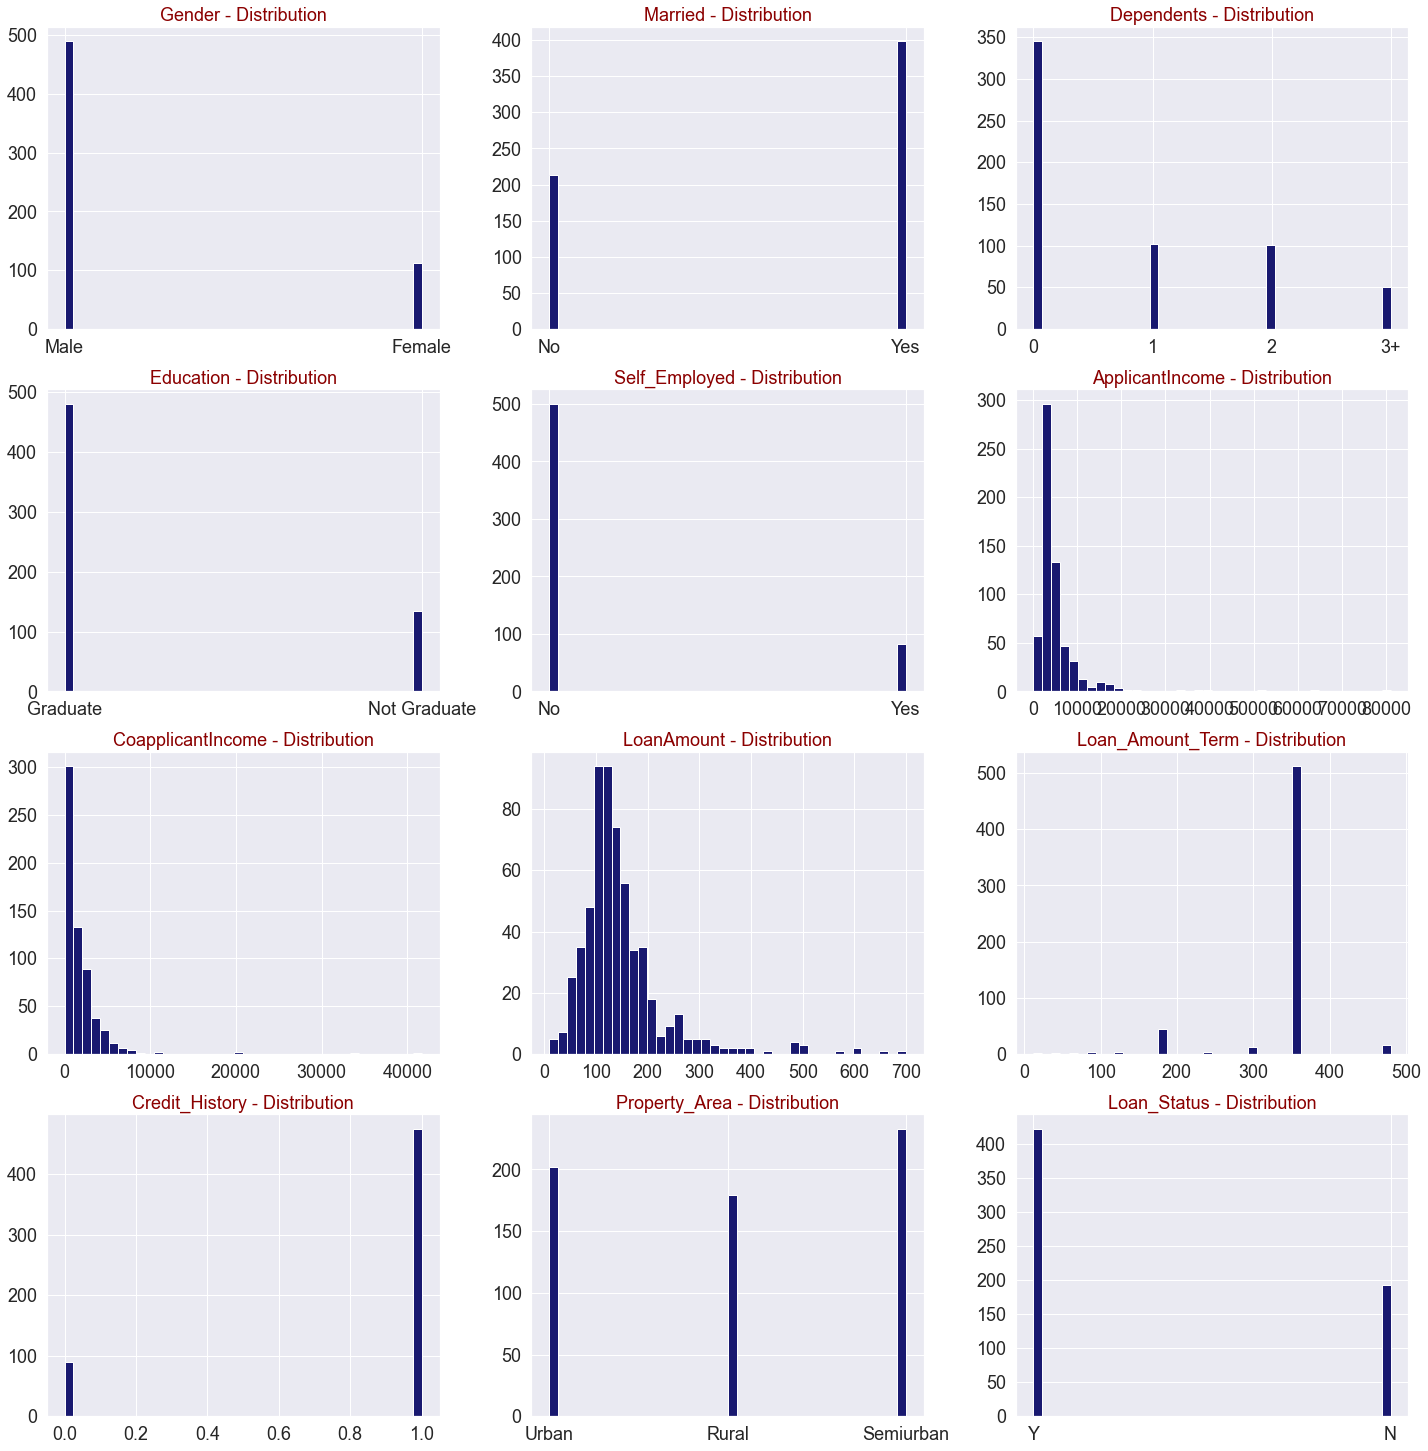

In [73]:
def draw_histogram(dataframe,features,row,col):
    fig = plt.figure(figsize=(20,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(row,col,i+1)
        dataframe[feature].hist(bins=40,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" - Distribution",color="DarkRed",fontsize=18)

        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        
    fig.tight_layout()
    plt.show()

draw_histogram(df,df.columns,6,3)

In [74]:
df.shape

(614, 12)

In [75]:

df.sort_values(["ApplicantIncome"],ascending=False).head(20)

# We can consider Applicant Income greater than 30000 as outliers



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
506,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y
284,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N


In [76]:

df.sort_values(["CoapplicantIncome"],ascending=False).head(20)

# We can consider Applicant Income greater than 11500 as outliers

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
177,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
122,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
444,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y
12,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [77]:
df = df.drop(df[df['ApplicantIncome']>30000].index)
df = df.drop(df[df['CoapplicantIncome']>11500].index)
df.shape

(603, 12)

In [78]:
df[df.isna().any(axis=1)]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
588,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [79]:
df.columns[df.isna().any()].tolist()

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [80]:
df['LoanAmount'].isnull().sum()

22

In [81]:
df['Loan_Amount_Term'].isnull().sum()

14

In [82]:
df['Loan_Amount_Term'].value_counts(sort=False)

360.0    505
120.0      3
240.0      4
180.0     41
60.0       2
300.0     12
480.0     15
36.0       2
84.0       4
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [83]:
# For Categorical columns we can replace NaN values with mode
# Though Loan_Amount_Term and Credit_History are numerical columns they are having repeated values so they 
# can be considered for filling NaN values with mode
cat_cols = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df.columns[df.isna().any()].tolist()

['LoanAmount']

In [84]:
df.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df['LoanAmount'].mean()

143.22203098106712

In [86]:
df[df['LoanAmount'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,Urban,N
102,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [88]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [90]:

df['Loan_Status'] = df.apply(lambda x : 0 if x['Loan_Status'] == 'N' else 1,axis=1) 
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,143.222031,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [91]:
df = pd.get_dummies(data=df)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,143.222031,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [92]:

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df[num_cols] = std.fit_transform(df[num_cols])

df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.268699,-0.820017,0.000000,0.264768,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.096040,0.031981,-0.197592,0.264768,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,-0.552108,-0.820017,-1.002394,0.264768,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,-0.672248,0.512219,-0.301438,0.264768,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,0.312203,-0.820017,-0.028843,0.264768,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


# Modelling

In [94]:
from sklearn.model_selection import train_test_split

X=df.drop(['Loan_Status'],axis=1).values

y = df['Loan_Status'].values

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


# LogisticRegression Model

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

LRmodel = LogisticRegression()
LRmodel.fit(X_train,y_train)
predictions = LRmodel.predict(X_test)

print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


Accuracy score  87.29%
[[ 32  22]
 [  1 126]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.74        54
           1       0.85      0.99      0.92       127

    accuracy                           0.87       181
   macro avg       0.91      0.79      0.83       181
weighted avg       0.89      0.87      0.86       181



# Random Forest CLassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RFCmodel = RandomForestClassifier()
RFCmodel.fit(X_train,y_train)
predictions = RFCmodel.predict(X_test)
score = RFCmodel.score(X_test,y_test)

print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy score  85.64%
[[ 33  21]
 [  5 122]]
              precision    recall  f1-score   support

           0       0.87      0.61      0.72        54
           1       0.85      0.96      0.90       127

    accuracy                           0.86       181
   macro avg       0.86      0.79      0.81       181
weighted avg       0.86      0.86      0.85       181



# Support Vector Classification

In [99]:
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC(random_state=0, tol=1e-5)

SVCmodel.fit(X_train, y_train.ravel()) 

predictions = SVCmodel.predict(X_test)
score = SVCmodel.score(X_test,y_test)
print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy score  87.29%
[[ 32  22]
 [  1 126]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.74        54
           1       0.85      0.99      0.92       127

    accuracy                           0.87       181
   macro avg       0.91      0.79      0.83       181
weighted avg       0.89      0.87      0.86       181



C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

DTCmodel = DecisionTreeClassifier()
DTCmodel.fit(X_train,y_train)
predictions = DTCmodel.predict(X_test)
score = DTCmodel.score(X_test,y_test)

print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy score  69.61%
[[32 22]
 [33 94]]
              precision    recall  f1-score   support

           0       0.49      0.59      0.54        54
           1       0.81      0.74      0.77       127

    accuracy                           0.70       181
   macro avg       0.65      0.67      0.66       181
weighted avg       0.72      0.70      0.70       181



In [123]:
from sklearn.preprocessing import binarize

for i in range(0,50):
    cm2=0
    y_pred_prob_yes = LRmodel.predict_proba(X_test)
    y_pred2 = binarize(y_pred_prob_yes , i/50)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print('With',i/10,'threshold the confusion Matrix is' , '\n', cm2 , '\n',
         'with',cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0],'False Negatives')

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.02 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.04 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.06 as keyword args. From version 0.25 passing these as positional arguments will re

With 0.0 threshold the confusion Matrix is 
 [[  0  54]
 [  0 127]] 
 with 127 correct predictions and 0 False Negatives
With 0.1 threshold the confusion Matrix is 
 [[  0  54]
 [  0 127]] 
 with 127 correct predictions and 0 False Negatives
With 0.2 threshold the confusion Matrix is 
 [[  0  54]
 [  0 127]] 
 with 127 correct predictions and 0 False Negatives
With 0.3 threshold the confusion Matrix is 
 [[  1  53]
 [  0 127]] 
 with 128 correct predictions and 0 False Negatives
With 0.4 threshold the confusion Matrix is 
 [[  2  52]
 [  0 127]] 
 with 129 correct predictions and 0 False Negatives
With 0.5 threshold the confusion Matrix is 
 [[  4  50]
 [  0 127]] 
 with 131 correct predictions and 0 False Negatives
With 0.6 threshold the confusion Matrix is 
 [[  5  49]
 [  0 127]] 
 with 132 correct predictions and 0 False Negatives
With 0.7 threshold the confusion Matrix is 
 [[  9  45]
 [  0 127]] 
 with 136 correct predictions and 0 False Negatives
With 0.8 threshold the confusion

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.72 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.74 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.76 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.78 as keyword args. From version 0.25 passing these as positional arguments will r

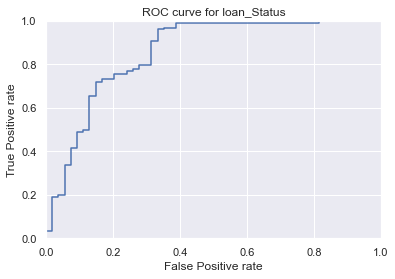

In [124]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC curve for loan_Status')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid(True)

In [125]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8568095654709827

In [119]:
# The area under the ROC curve is 85.68% which is good
# THreshold of 3.4 gives the optimum result of TP,TN,FP,FN which should be considered for testing
# Overall model could be improved with more data
